# Convolutional neural network to classify images of rock paper and scissors


## Index
1. [Import the Libraries and Modules](#import-the-libraries-and-modules)
2. [Upload the Training and Validation Dataset](#upload-the-training-and-validation-dataset)
3. [Inspect the File Upload Process](#inspect-the-file-upload-process)
4. [Inspect the Training Photos](#inspect-the-training-photos)
5. [Build the Convolutional Neural Network](#build-the-convolutional-neural-network)
6. [Prepare the Training and Validation Dataset](#prepare-the-training-and-validation-dataset)
7. [Data Augmentation to Prevent Overfitting](#data-augmentation-to-prevent-overfitting)
8. [Define the Cost Function and Optimizer](#define-the-cost-function-and-optimizer)
9. [Train the Model for 25 Epochs](#train-the-model-for-25-epochs)
10. [Plot the Training and Validation Loss and Accuracy](#plot-the-training-and-validation-loss-and-accuracy)
11. [Test the Model on Unseen Images](#test-the-model-on-unseen-images)

### Import the libraries and modules

In [5]:
import os
import random
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from ipywidgets import widgets

### Upload the training and validation dataset
Steps:

1. In the runtime disk, create a folder named rpsimages
2. upload rpsimages_upload.zip into the the rpsimages folder
3. unizip by running the code below

In [9]:
!unzip ./rpsimages/rpsimages_upload.zip -d ./rpsimages

Archive:  ./rpsimages/rpsimages_upload.zip
   creating: ./rpsimages/rpsimages_upload/Training/
   creating: ./rpsimages/rpsimages_upload/Training/paper/
  inflating: ./rpsimages/rpsimages_upload/Training/paper/04l5I8TqdzF9WDMJ.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0cb6cVL8pkfi4wF6.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0eqArS2GgsBeqgSn.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0Og76sl5CJhbxWWx.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0RA9rcrv8iVvuDDU.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0t08v9bAaA0mXGCQ.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0Uomd0HvOB33m47I.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0vugygEjxQJPr9yz.png  
  inflating: ./rpsimages/rpsimages_upload/Training/paper/0zKU6wEhT2cDe9j0.png  
  inflating: ./rpsimages/rpsimages_upload/Train

### Inspect the file upload process

1. Check the subfolders in the Training folder
2. Check the number of images in the subfolder of every class
3. Sample 5 files from every subfolder

In [11]:
BASE_DIR = './rpsimages/rpsimages_upload/Training'

testing = os.listdir(BASE_DIR)
print(testing)

rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print('total training rock images:', len(rock_files))
print('total training paper images:', len(paper_files))
print('total training scissors images:', len(scissors_files))

print()
print(f"5 files of rock images: {rock_files[:5]}")
print(f"5 files of paper images: {paper_files[:5]}")
print(f"5 files of scissors images: {scissors_files[:5]}")

['scissors', 'paper', 'rock']
total training rock images: 676
total training paper images: 662
total training scissors images: 700

5 files of rock images: ['Qs7kzLICH4ZpdyPo.png', 'kcZfTQqKr8VaSjhk.png', 'R5nXVOQnotizkrJB.png', '1WuMUpzupKs67q29.png', 'iCLIvwweBESAwx4z.png']
5 files of paper images: ['5Cy2fFOaWMFwa5iu.png', 'y2auZRkrUIi0wvd2.png', 'SsvKZDW23vRQMUtA.png', 'X5YjuJk3mrupKDrG.png', 'ib30bLCbBl0mKWko.png']
5 files of scissors images: ['wT8z7icdMJt816Ix.png', 'psMU7A2lP3JHiyjV.png', 'ZKG6hW0U101PcEoo.png', 'T6IiF7nWO9Tf0adD.png', 'xALf82q7G9zbPjgN.png']


### Inspect the training photos

1. Sample 5 files from every subfolder
2. Print the images using matplotlib

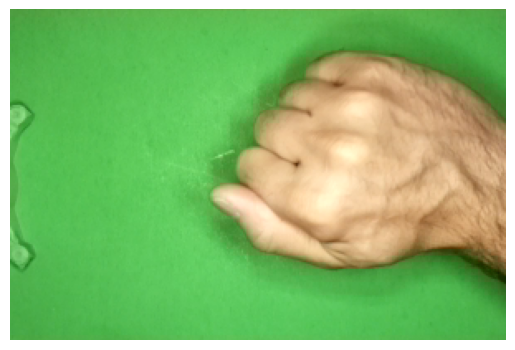

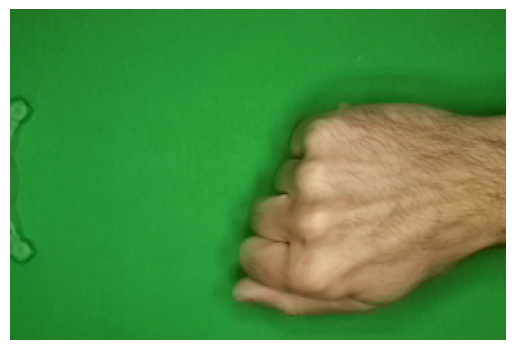

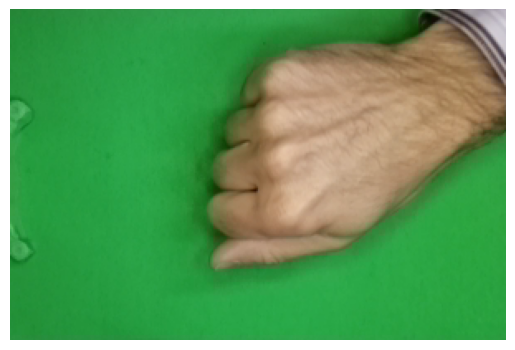

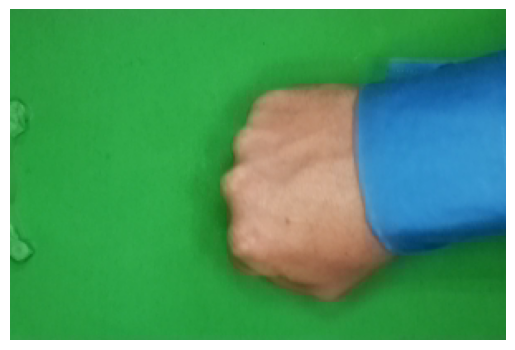

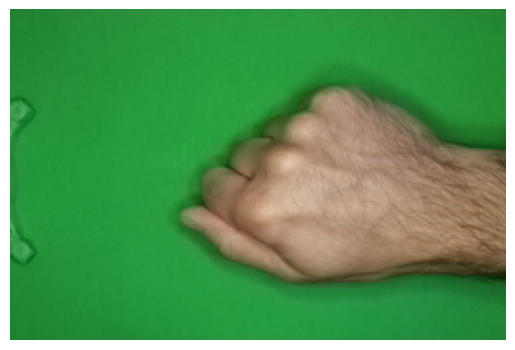

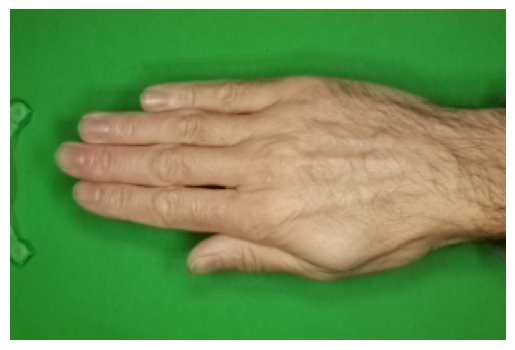

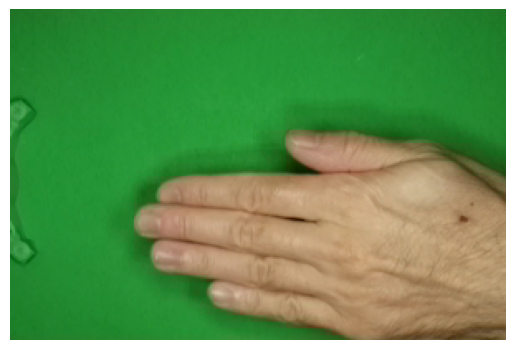

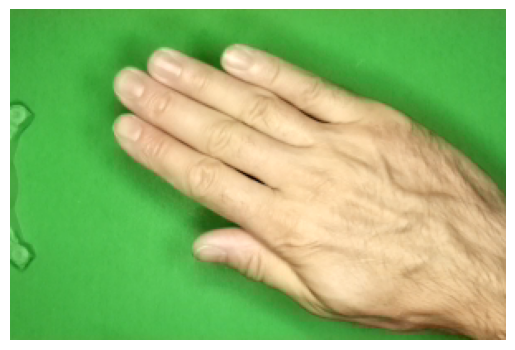

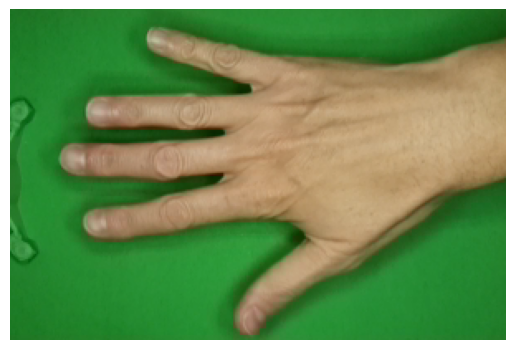

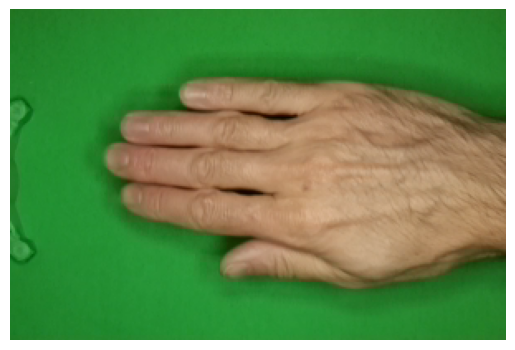

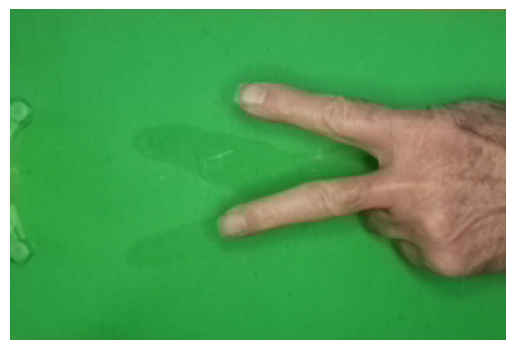

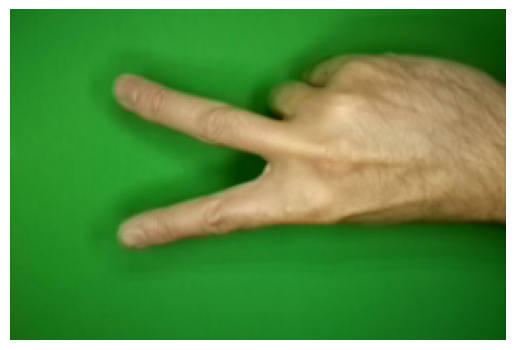

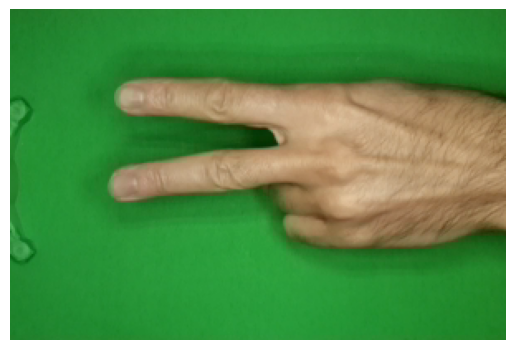

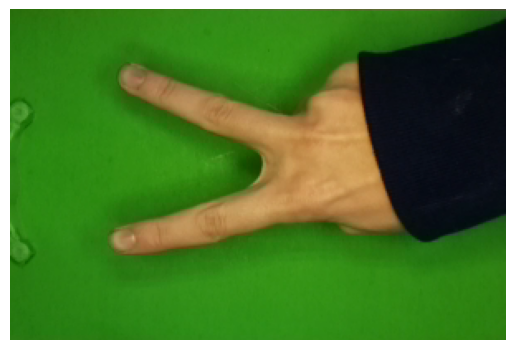

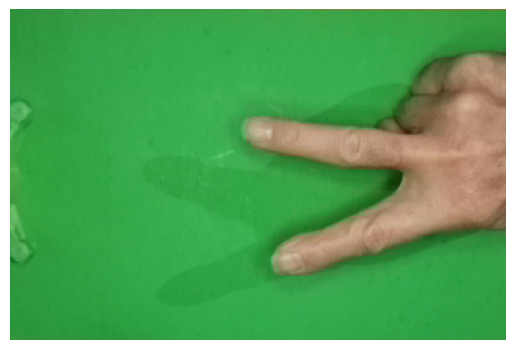

In [12]:
next_rock = [os.path.join(rock_dir, fname)
                for fname in random.sample(rock_files, 5)]
next_paper = [os.path.join(paper_dir, fname)
                for fname in random.sample(paper_files, 5)]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in random.sample(scissors_files, 5)]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    # print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

### Build the Convolutional Neural network

1. Image resizing and value normalising
2. 4 Convolutional + Maxpooling layers
3. 1 fully connected layer
4. 1 output softmax layer with three classes

Refer to the model summary for more details

In [13]:
model =  tf.keras.models.Sequential([
    #Rescale the image into 150*150*3 tensors and normalize the data
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.Rescaling(1./255),

    #1st conv layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #2nd conv layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #3rd conv layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #4th conv layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the activations to feed into a fully connected NN
    tf.keras.layers.Flatten(),

    #Dropout to reduce the chances of overfitting
    tf.keras.layers.Dropout(0.5),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    #Softmax layer to do output categorical results
    tf.keras.layers.Dense(3, activation='softmax')


])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

### Prepare the training and validation dataset

1. Create dataset objects for the training and validation respectively

 (resize, group into batches, labelling according to the folder name)

2. Optimize the dataset to make the training faster

In [14]:
TRAINING_DIR = "./rpsimages/rpsimages_upload/Training"
VALIDATION_DIR = "./rpsimages/rpsimages_upload/val"

#Label the images and arrange images into batches

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
)

#MAKE THE TRAINING FASTER
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                        .shuffle(SHUFFLE_BUFFER_SIZE)
                        .prefetch(PREFETCH_BUFFER_SIZE)
                        )

val_dataset_final = (val_dataset
                       .cache()
                        .prefetch(PREFETCH_BUFFER_SIZE)
                        )

Found 2038 files belonging to 3 classes.
Found 150 files belonging to 3 classes.


### Data augmentation to prevent overfitting

1. Random transformation to every training images so the model can generalize better

2. Attach the data augmentation layer onto the classifier model

In [15]:
#Processes to augment the data (ie make random transformation to the images)
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2),
])

#attach the layers to the image classifier network
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

### Define the cost function and optimizer

1. Use adam for faster and more stable gradient descent
2. Use Categorical Crossentropy for classification task for multiple categories

In [16]:
model_with_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train the model for 25 epochs

In [17]:
history = model_with_aug.fit(
    train_dataset_final,
    epochs=25,
    validation_data = val_dataset_final,
    verbose = 1
)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.3624 - loss: 1.1015 - val_accuracy: 0.4867 - val_loss: 1.0410
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4408 - loss: 1.0463 - val_accuracy: 0.4133 - val_loss: 0.9790
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6191 - loss: 0.8594 - val_accuracy: 0.6600 - val_loss: 0.7599
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6804 - loss: 0.7239 - val_accuracy: 0.7267 - val_loss: 0.5774
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7516 - loss: 0.5906 - val_accuracy: 0.7867 - val_loss: 0.5384
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7737 - loss: 0.5504 - val_accuracy: 0.8133 - val_loss: 0.3450
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8201 - loss: 0.4296 - val_accuracy: 0.9800 - val_loss: 0.1533
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8507 - loss: 0.3654 - val_accuracy: 0.9800 - 

### Plot the training and validation loss and accuracy from a history object

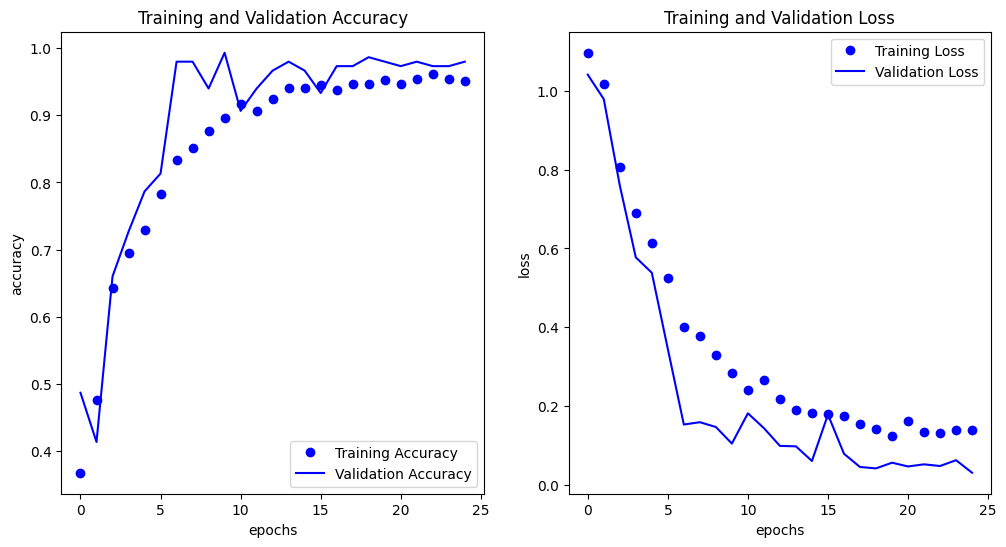

In [18]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object.'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12,6))
  ax[0].plot(epochs, acc, 'bo', label='Training Accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
  ax[0].set_title('Training and Validation Accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and Validation Loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

### Test the model on unseen images


In [28]:
# File upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=True)
display(uploader)
out = widgets.Output()
display(out)

# Function to handle display issues and run prediction
def file_predict(filename, file, out):
    # Load and preprocess the image
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Do not apply data augmentation on data for prediction
    prediction = model.predict(image)

    # Display the result
    with out:
        print(f'\nModel output: {prediction}')
        prediction_index = np.argmax(prediction)

        classes = ["paper", "rock", "scissors"]
        predicted_class = classes[prediction_index]
        print(f'{filename} is a {predicted_class}')

# Function to handle file upload change
def on_upload_change(change):
    for filename, file_info in uploader.value.items():
        # Extract file content
        file_jpgdata = BytesIO(file_info['content'])
        file_predict(filename, file_jpgdata, out)

# Observe changes in uploader
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
